# The Jones Calculus Formalism

Basic tests and visualization options for the `pypolar.jones` module.  Conventions follow those of Shurcliff, Polarized Light Production and Use, (1966).  Angles are based on looking towards the source.

**Scott Prahl**

*edited March 2019*

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

try:
    import pypolar.jones as jones
except ImportError:
    print("Python module 'pypolar' is not installed!!")
    print("To install excecute the following in a Jupyter cell")
    print("    !pip install pypolar")
    
import pypolar.visualization as vis

Shurcliff writes

>In preparing this book the author faced a major problem as to conventions. The crux of the problem was the large number of branches of optics that must be brought into one consistent family. Traditionally, users of saccharimeters and other polarimeters employ a certain set of sign conventions, persons dealing with dichroism employ certain conventions, and similarly for persons dealing with crystallography, wave theory, the Stokes vector, the Poincare sphere, the Mueller calculus, and the Jones calculus. Ordinarily, the incompatibility of the various sets of conventions as to signs, handedness, etc., is unnoticed and unimportant. In this book, however, one universally self-consistent set of conventions is mandatory. Accordingly, some conflict with various lesser sets is unavoidable.


The electric field vector for plane-parallel light travelling in the $z$-direction is

$$
\mathbf{E}(x,y,z,t) = \mathbf{E}(z,t)
=
\begin{pmatrix}E_x(t)\\ E_y(t)\\ 0 \end{pmatrix}
=
\begin{pmatrix}E_{0x}e^{j(kz-\omega t+\phi_x)}\\ E_{0y}e^{j(kz-\omega t+\phi_y)}\\ 0\end{pmatrix}
=
\begin{pmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{i\phi_y}\\ 0 \end{pmatrix} e^{j(kz-\omega t)}.
$$

where the [spatial frequency](https://en.wikipedia.org/wiki/Spatial_frequency) $k$ and the [angular frequency](https://en.wikipedia.org/wiki/Angular_frequency) $\omega$ are related to the wavelength $\lambda$ and frequency $f$

$$
k = \frac{2\pi}{\lambda}
\qquad\mbox{and}\qquad
\omega = 2\pi f
$$


From this equation, we see that the electric field vector for this plane wave

1. has no $z$-component
2. has no dependence on $x$ or $y$
3. has a spatial period of $\lambda$ in the $z$-direction
4. has a temporal period of $f$ 
5. has constant (real) field amplitudes $E_{0x}$ and $E_{0y}$
6. has constant (real) phases $\phi_x$ and $\phi_y$ 
7. has the same modulation in time or space for both electric fields

These requirements mean that this representation only applies to fully polarized light.

[Jones](https://en.wikipedia.org/wiki/Robert_Clark_Jones) observed that such waves could conveniently be represented by a vector of two complex numbers (or four real numbers)

$$
\begin{pmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{j\phi_y} \end{pmatrix}
=
\begin{pmatrix}E_{0x}\cos\phi_x + j E_{0x}\sin\phi_x \\ E_{0y}\cos\phi_y + j E_{0y}\sin\phi_y\end{pmatrix}
\qquad
\fbox{Receiver point of view}
$$

where increase in $\phi_x$ indicates retardation (delay, lag) in phase.

## Implicit assumptions

### Point of View

The above formulation only applies if one is looking at the wave from the receiver perspective — looking into the source.  If the point of view is from the source then the equation is

$$
\mathbf{E}(z,t)
=
\begin{pmatrix}E_{0x}e^{j\phi_x'}\\ E_{0y}e^{i\phi_y'}\\ 0 \end{pmatrix} e^{j(\omega t-kz)}
\qquad
\fbox{Source point of view}
$$

the problem arises because the same Jones vector can be extracted

$$
\begin{pmatrix}E_{0x}e^{j\phi_x'}\\ E_{0y}e^{j\phi_y'} \end{pmatrix}
=
\begin{pmatrix}E_{0x}\cos\phi_x' + j E_{0x}\sin\phi_x' \\ E_{0y}\cos\phi_y' + j E_{0y}\sin\phi_y'\end{pmatrix}
\qquad
\fbox{Source point of view}
$$

but now an increase in $\phi_x'$ indicates advancement (lead) in phase.  Thus one can convert between the source and receiver points of view by noting that $\phi'=-\phi$.  Therefore

$$
\begin{pmatrix}E_{0x}\cos\phi_x' + j E_{0x}\sin\phi_x' \\ E_{0y}\cos\phi_y' + j E_{0y}\sin\phi_y'\end{pmatrix}
=
\begin{pmatrix}E_{0x}\cos\phi_x - j E_{0x}\sin\phi_x \\ E_{0y}\cos\phi_y - j E_{0y}\sin\phi_y\end{pmatrix}
\qquad
\fbox{Source point of view}
$$

and one sees that receiver point-of-view representations can be converted to source point-of-view by changing the signs of the imaginary terms.

### Normalization

Often Jones vectors are normalized so that the vector magnitude is unity.

In this case the vectors are muliplied by

$$
\textbf{J}_\mathrm{norm} = \frac{1}{\sqrt{E_{0x}^2+E_{0y}^2}}\begin{pmatrix}E_{0x}e^{j\phi_x}\\ E_{0y}e^{j\phi_y} \end{pmatrix}
$$

### Phase Shift

Jones vectors can be multiplied by an arbitrary overall phase without changing the normalization.  This effectively allows one to set the phase of the x-field to zero and therefore the top term will be a real number.

$$
\textbf{J}_\mathrm{norm,shifted} = \frac{1}{\sqrt{E_{0x}^2+E_{0y}^2}}\begin{pmatrix}E_{0x}\\ E_{0y}e^{j(\phi_y-\phi_x)} \end{pmatrix}
$$

In [ ]:
Wikipedia - Receiver
Hecht - Receiver
Fowles - Receiver
Born & Wolf - Receiver

Kliger - Source
Shurcliff - Source
Collett - Source
Azzam - Source
Goldstein - Source

This leads us to the standard set of Jones vectors used in optics (and used throughout `pypolar`)


In [2]:
light = jones.field_horizontal()
print("Jones vector for horizontally-polarized light")
print(light)

light = jones.field_vertical()
print("Jones vector for vertically-polarized light")
print(light)

light = jones.field_linear(np.radians(45))
print("Jones vector for 45° linearly polarized light")
print(light)

light = jones.field_right_circular()
print("Jones vector for right circularly polarized light")
print(light)

light = jones.field_left_circular()
print("Jones vector for left circularly polarized light")
print(light)

Jones vector for horizontally-polarized light
[1 0]
Jones vector for vertically-polarized light
[0 1]
Jones vector for 45° linearly polarized light
[0.70710678 0.70710678]
Jones vector for right circularly polarized light
[0.70710678+0.j         0.        -0.70710678j]
Jones vector for left circularly polarized light
[0.70710678+0.j         0.        +0.70710678j]


# Basic Polarization Fields

# Intensities

In [3]:
light = jones.field_horizontal()
inten = jones.intensity(light)
print("Intensity for horizontally-polarized    light %.3f" % inten)

light = jones.field_vertical()
inten = jones.intensity(light)
print("Intensity for vertically-polarized      light %.3f" % inten)

light = jones.field_linear(np.radians(45))
inten = jones.intensity(light)
print("Intensity for 45° linearly polarized     light %.3f" % inten)

light = jones.field_right_circular()
inten = jones.intensity(light)
print("Intensity for right circularly polarized light %.3f" % inten)

light = jones.field_left_circular()
inten = jones.intensity(light)
print("Intensity for left circularly polarized  light %.3f" % inten)

Intensity for horizontally-polarized    light 1.000
Intensity for vertically-polarized      light 1.000
Intensity for 45° linearly polarized     light 1.000
Intensity for right circularly polarized light 1.000
Intensity for left circularly polarized  light 1.000


# Phase Differences

In [33]:
light = jones.field_horizontal()
phase = jones.phase(light)
print("Jones vector for horizontally-polarized light")
print("phase is %.2f°" % (np.degrees(phase)))

light = jones.field_vertical()
phase = jones.phase(light)
print("Jones vector for vertically-polarized light")
print("phase is %.2f°" % (np.degrees(phase)))

light = jones.field_linear(np.radians(45))
phase = jones.phase(light)
print("Jones vector for 45° linearly polarized light")
print("phase is %.2f°" % (np.degrees(phase)))

light = jones.field_right_circular()
phase = jones.phase(light)
print("Jones vector for right circularly polarized light")
print("phase is %.2f°" % (np.degrees(phase)))

light = jones.field_left_circular()
phase = jones.phase(light)
print("Jones vector for left circularly polarized light")
print("phase is %.2f°" % (np.degrees(phase)))

Jones vector for horizontally-polarized light
phase is 0.00°
Jones vector for vertically-polarized light
phase is 0.00°
Jones vector for 45° linearly polarized light
phase is 0.00°
Jones vector for right circularly polarized light
phase is -90.00°
Jones vector for left circularly polarized light
phase is 90.00°


# Linear Polarizers

In [34]:
for theta in [0,45,90,-45]:
    print('Jones Matrix for perfect linear polarizer at angle theta=',theta)
    L = jones.op_linear_polarizer(np.radians(theta))
    print(L)
    print()

Jones Matrix for perfect linear polarizer at angle theta= 0
[[1. 0.]
 [0. 0.]]

Jones Matrix for perfect linear polarizer at angle theta= 45
[[0.5 0.5]
 [0.5 0.5]]

Jones Matrix for perfect linear polarizer at angle theta= 90
[[3.74939946e-33 6.12323400e-17]
 [6.12323400e-17 1.00000000e+00]]

Jones Matrix for perfect linear polarizer at angle theta= -45
[[ 0.5 -0.5]
 [-0.5  0.5]]



# Quarter-Wave Plates

In [4]:
for theta in [0,45,90,-45]:
    print('Jones Matrix for quarter wave plate with fast axis at angle theta=',theta)
    L = jones.op_quarter_wave_plate(np.radians(theta))
    print(L)
    norm = L[0,0]
    print("... and when scaled by so top left element is unity")
    print(L/norm)
    print()

Jones Matrix for quarter wave plate with fast axis at angle theta= 0
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]
... and when scaled by so top left element is unity
[[1.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 1.57009246e-16-1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 45
[[0.70710678+1.11022302e-16j 0.        +7.07106781e-01j]
 [0.        +7.07106781e-01j 0.70710678-1.11022302e-16j]]
... and when scaled by so top left element is unity
[[1.00000000e+00+0.00000000e+00j 1.57009246e-16+1.00000000e+00j]
 [1.57009246e-16+1.00000000e+00j 1.00000000e+00-3.14018492e-16j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 90
[[0.70710678-7.07106781e-01j 0.        +8.65956056e-17j]
 [0.        +8.65956056e-17j 0.70710678+7.07106781e-01j]]
... and when scaled by so top left element is unity
[[ 1.00000000e+00+0.000000e+00j -6.12323400e-17+6.123234e-17j]
 [-6.12323400e-17+6.123234e

# Half-Wave Plates

In [4]:
for theta in np.radians([0,90]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = jones.op_half_wave_plate(theta)
    print(L)
    norm = L[0,0]
    print("... and when scaled by so top left element is unity")
    print(L/norm)
    print()
    
for theta in np.radians([45,-45]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = jones.op_half_wave_plate(theta)
    print(L)
    print()

Jones Matrix for half-wave plate with fast axis at angle theta= 0.0
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17-1.j]]
... and when scaled by so top left element is unity
[[ 1.+0.0000000e+00j  0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j -1.-1.2246468e-16j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 90.0
[[6.123234e-17-1.0000000e+00j 0.000000e+00+1.2246468e-16j]
 [0.000000e+00+1.2246468e-16j 6.123234e-17+1.0000000e+00j]]
... and when scaled by so top left element is unity
[[ 1.0000000e+00-0.00000000e+00j -1.2246468e-16+7.49879891e-33j]
 [-1.2246468e-16+7.49879891e-33j -1.0000000e+00+1.22464680e-16j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 45.0
[[6.123234e-17+2.22044605e-16j 0.000000e+00+1.00000000e+00j]
 [0.000000e+00+1.00000000e+00j 6.123234e-17-2.22044605e-16j]]

Jones Matrix for half-wave plate with fast axis at angle theta= -45.0
[[ 6.123234e-17+2.22044605e-16j -0.000000e+00-1.00000000e+00j]
 [-0.000000e+00-1.00000

# Visualization

<IPython.core.display.Javascript object>


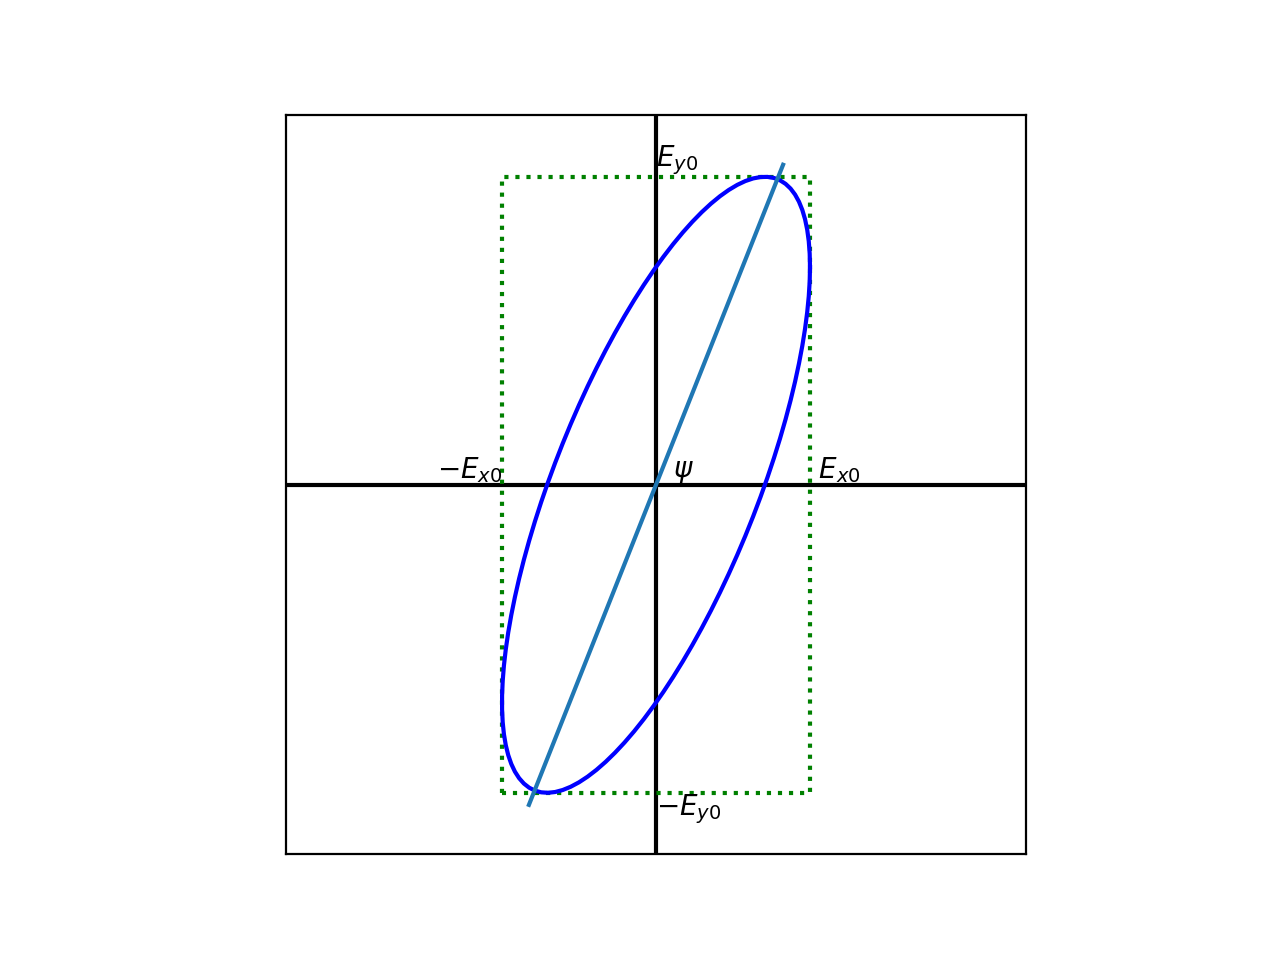

In [39]:
phi=np.pi/4
v = np.array([1,2*np.exp(phi*1j)])
aplt = vis.draw_jones_ellipse(v)
aplt.show()

<IPython.core.display.Javascript object>


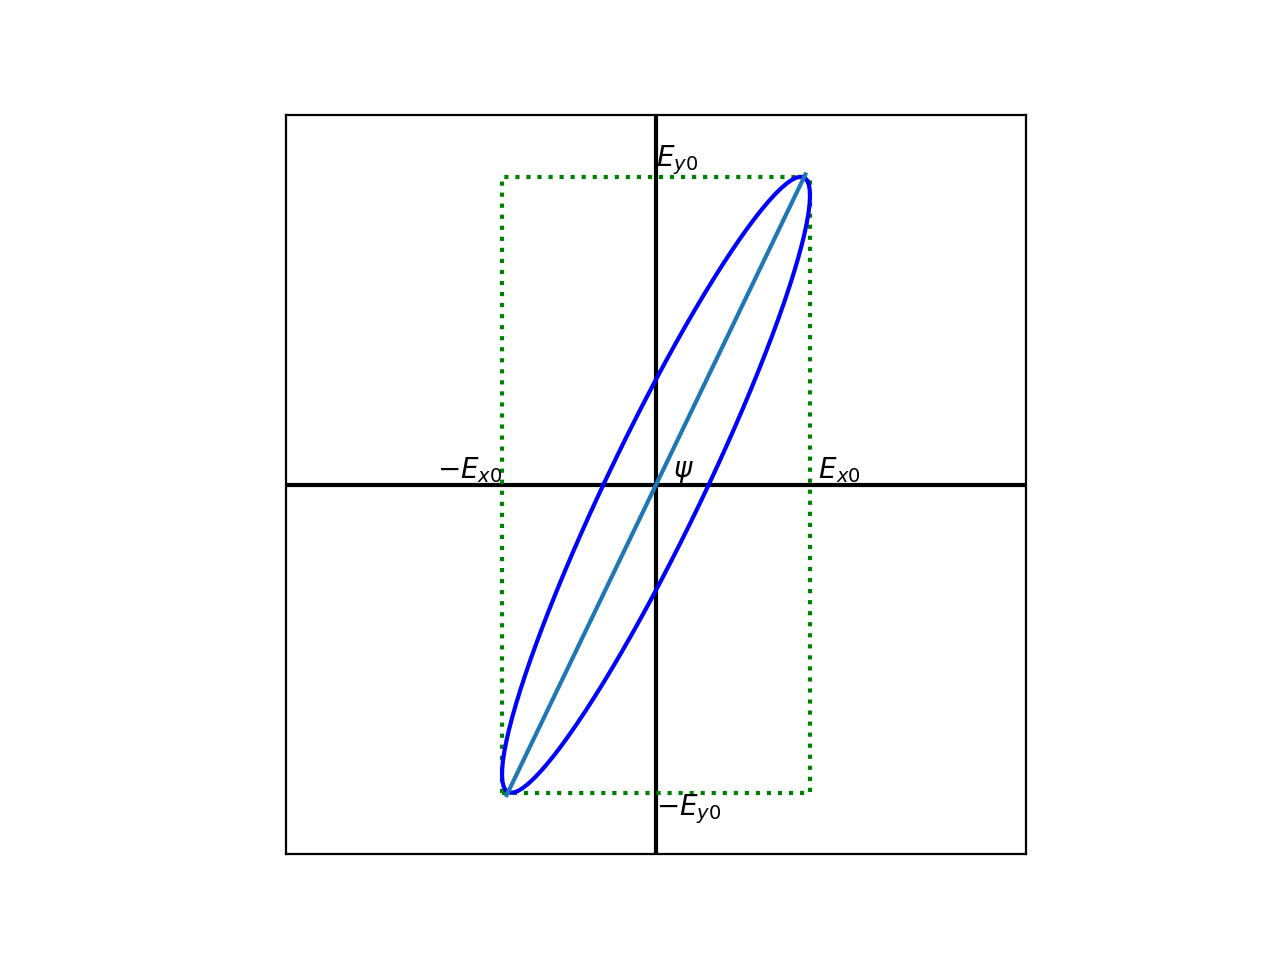

gamma=20.00
psi=64.30
alpha=63.43
chi=7.75
b/a=0.14
E_x=0.447
E_y=0.894
E_y/E_x=2.000
I=1.00


In [65]:
v = jones.field_elliptical(np.arctan(2),np.radians(20))
aplt = vis.draw_jones_ellipse(v)
aplt.show()

gamma=jones.phase(v)
print('gamma=%.2f'%(gamma*180/np.pi))

psi=jones.ellipse_orientation(v)
print('psi=%.2f'%(psi*180/np.pi))

alpha=jones.ellipse_azimuth(v)
print('alpha=%.2f'%(alpha*180/np.pi))

chi=jones.ellipse_ellipticity(v)
print('chi=%.2f'%(chi*180/np.pi))

a,b = jones.ellipse_axes(v)
print('b/a=%.2f'%(b/a))

E_x,E_y = np.abs(v)
print('E_x=%.3f'%E_x)
print('E_y=%.3f'%E_y)
print('E_y/E_x=%.3f'%(E_y/E_x))


inten = jones.intensity(inten)
print('I=%.2f' % inten)

<IPython.core.display.Javascript object>


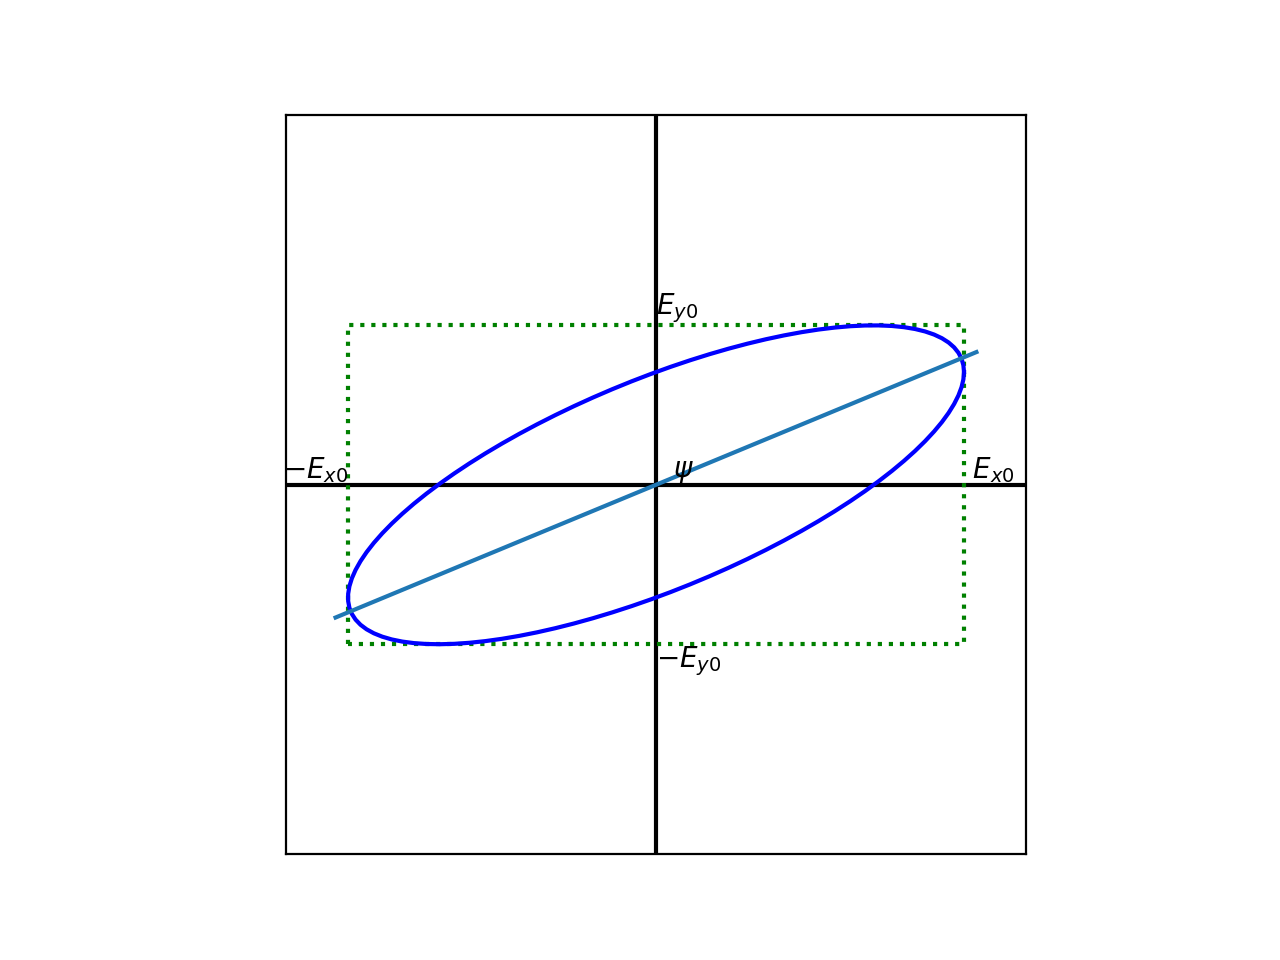

gamma=45.00
psi=22.50
alpha=27.37
chi=15.00
b/a=0.318
E_x=0.888
E_y=0.460
E_y/E_x=0.518
I=1.00


In [67]:
v = 0.325*np.array([2.732,1+1j])
aplt = vis.draw_jones_ellipse(v)
aplt.show()

gamma=jones.phase(v)
print('gamma=%.2f'%(gamma*180/np.pi))

psi=jones.ellipse_orientation(v)
print('psi=%.2f'%(psi*180/np.pi))

alpha=jones.ellipse_azimuth(v)
print('alpha=%.2f'%(alpha*180/np.pi))

chi=jones.ellipse_ellipticity(v)
print('chi=%.2f'%(chi*180/np.pi))

a,b = jones.ellipse_axes(v)
print('b/a=%.3f'%(b/a))

E_x,E_y = np.abs(v)
print('E_x=%.3f'%E_x)
print('E_y=%.3f'%E_y)
print('E_y/E_x=%.3f'%(E_y/E_x))

inten = jones.intensity(inten)
print('I=%.2f' % inten)

<IPython.core.display.Javascript object>


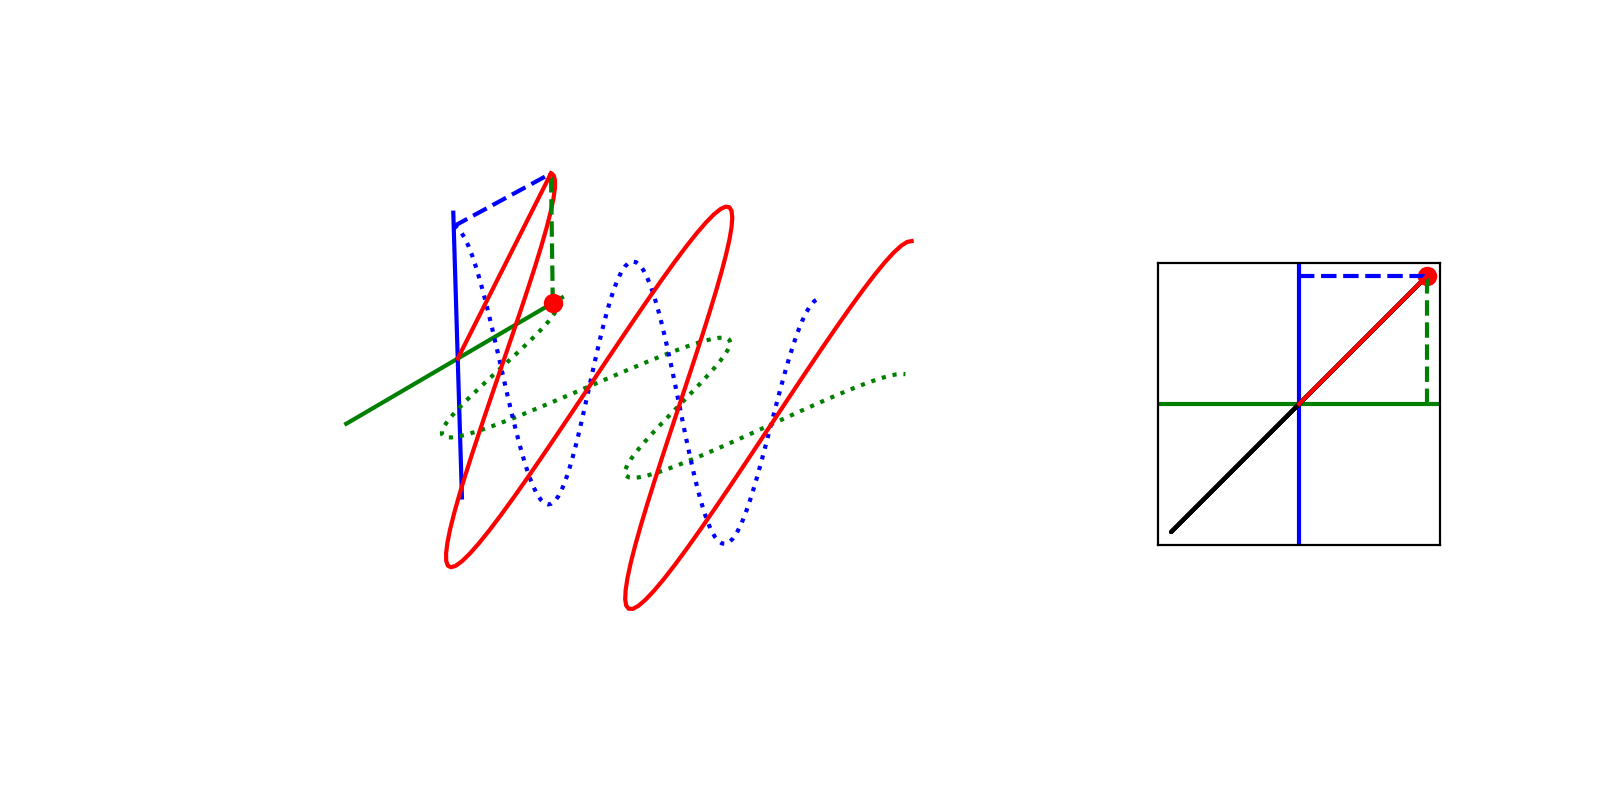

In [7]:
theta = np.radians(45)
v = jones.field_linear(theta)
aplt = vis.draw_jones_field(v)
aplt.show()

<IPython.core.display.Javascript object>


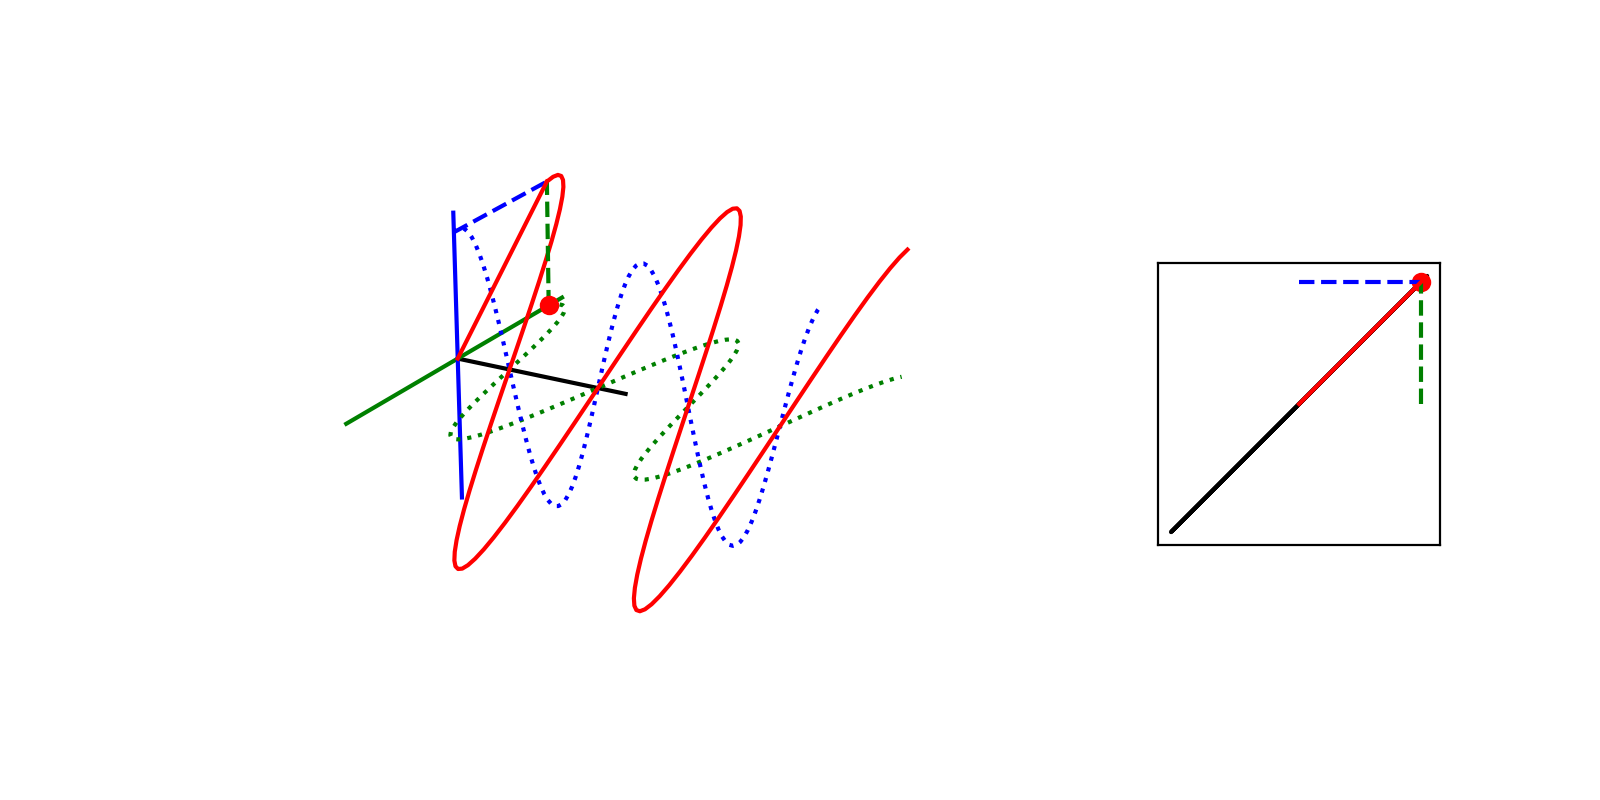

In [8]:
theta = np.radians(45)
v = jones.field_linear(theta)
vis.draw_jones_animated(v)

<IPython.core.display.Javascript object>


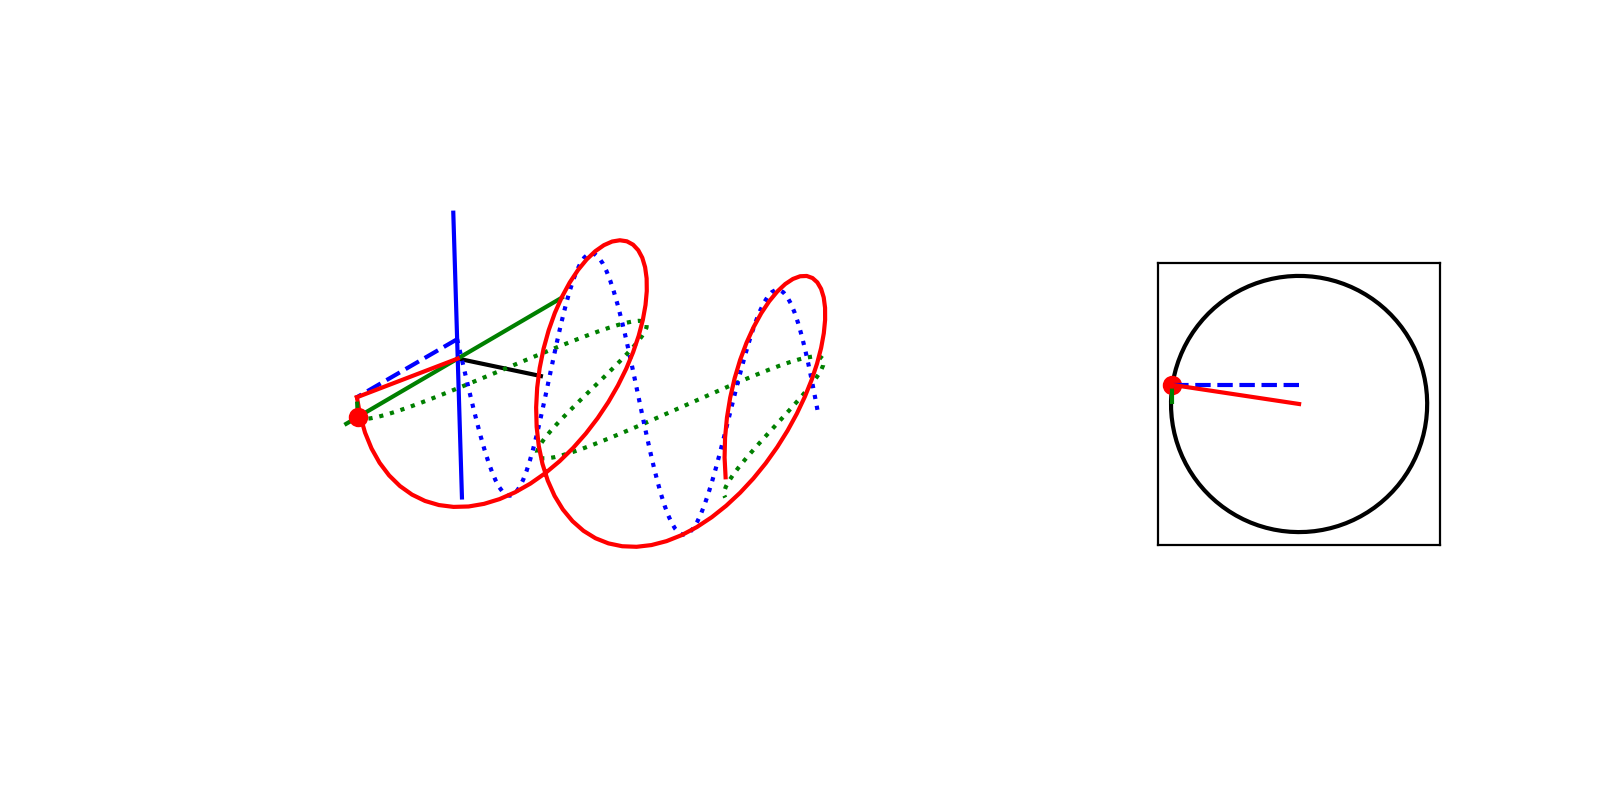

In [9]:
v = jones.field_left_circular()
vis.draw_jones_animated(v)

<IPython.core.display.Javascript object>


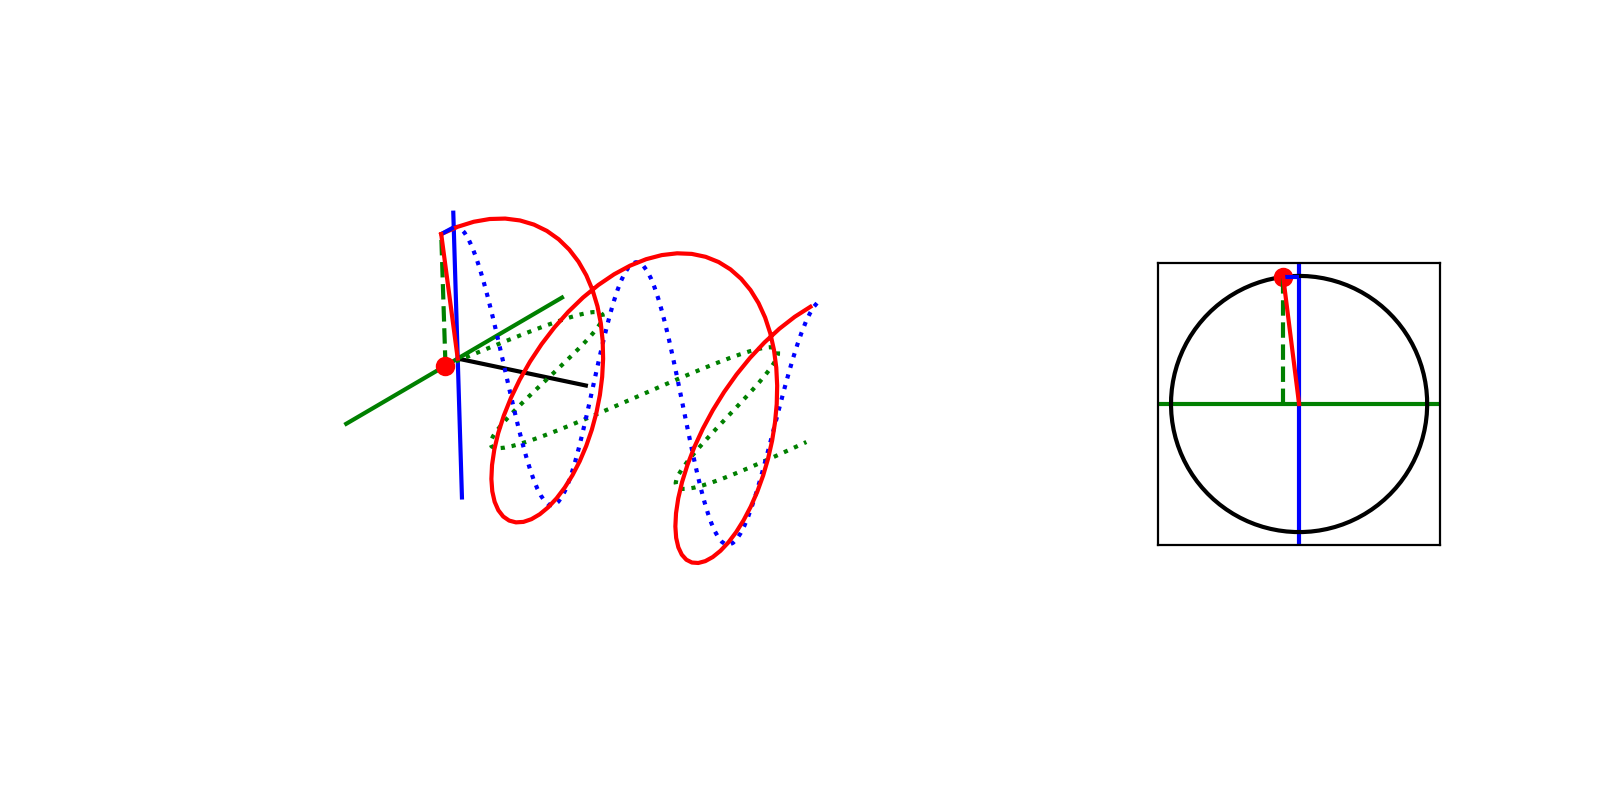

In [10]:
v=jones.field_right_circular()
vis.draw_jones_animated(v)

In [11]:
degree = 180/np.pi
A=1
B=1
delta=np.linspace(0,np.pi,50)
phi = np.zeros(50)
for i,d in enumerate(delta):
    v=np.array([A*np.exp(1j*np.pi/2),B*np.exp(1j*d+np.pi/2)])
    phi[i] = jones.ellipse_orientation(v)

plt.plot(delta*degree,phi*degree)
plt.ylim(-90,90)
plt.show()
#jones.draw_field_animated(v)
#print(delta[-1]*degree,phi[-1]*degree)
#jones.draw_field_ellipse(v)

# Field Interpretation

### Shurcliff 1964, page 28

In [52]:
v=np.array([0.3*np.exp(1j*np.pi/2),0.5*np.exp(-1j*0.2)])

gamma=jones.phase(v)
print('gamma=%.2f'%(gamma*180/np.pi))

psi=jones.ellipse_orientation(v)
print('psi=%.2f'%(psi*180/np.pi))

alpha=jones.ellipse_azimuth(v)
print('alpha=%.2f'%(alpha*180/np.pi))

chi=jones.ellipse_ellipticity(v)
print('chi=%.2f'%(chi*180/np.pi))

a,b = jones.ellipse_axes(v)
print('b/a=%.2f'%(b/a))

E_x,E_y = np.abs(v)
print('E_x=%.2f'%E_x)
print('E_y=%.2f'%E_y)

gamma=-101.46
psi=-79.78
alpha=59.04
chi=10.00
b/a=0.58
E_x=0.30
E_y=0.50


In [51]:
v = np.array([1,2*np.exp(phi*1j)])

gamma=jones.phase(v)
print('gamma=%.2f'%(gamma*180/np.pi))

psi=jones.ellipse_orientation(v)
print('psi=%.2f'%(psi*180/np.pi))

alpha=jones.ellipse_azimuth(v)
print('alpha=%.2f'%(alpha*180/np.pi))

chi=jones.ellipse_ellipticity(v)
print('chi=%.2f'%(chi*180/np.pi))

a,b = jones.ellipse_axes(v)
print('b/a=%.2f'%(b/a))

E_x,E_y = np.abs(v)
print('E_x=%.2f'%E_x)
print('E_y=%.2f'%E_y)

gamma=45.00
psi=68.34
alpha=63.43
chi=14.51
b/a=0.31
E_x=1.00
E_y=2.00


In [13]:
v=jones.field_horizontal()
jones.interpret(v)

'Intensity is 1.000\nPhase is 0.0°\nLinear polarization at 0.000000 degrees CCW from x-axis'

In [14]:
v=jones.field_vertical()
jones.interpret(v)

'Intensity is 1.000\nPhase is 0.0°\nLinear polarization at 90.000000 degrees CCW from x-axis'

In [15]:
theta = np.radians(45)
v=jones.field_linear(theta)
jones.interpret(v)

'Intensity is 1.000\nPhase is 0.0°\nLinear polarization at 45.000000 degrees CCW from x-axis'

In [16]:
v=np.array([3*np.exp(-1j*np.pi), 3*np.exp(-1j*np.pi/3)])
jones.interpret(v)

'Intensity is 18.000\nPhase is 120.0°\nLeft circular polarization'

In [17]:
v=np.array([1,-1j])
jones.interpret(v)

'Intensity is 2.000\nPhase is -90.0°\nRight circular polarization'

# Optical isolator

In [18]:
A = jones.field_linear(np.pi/4)
B = jones.op_linear_polarizer(0)
C = jones.op_quarter_wave_plate(np.pi/4)
D = jones.op_linear_polarizer(np.pi/2)

In [19]:
np.dot(np.dot(D,C),B)

matrix([[2.65122578e-33+4.32978028e-17j, 0.00000000e+00+0.00000000e+00j],
        [4.32978028e-17+7.07106781e-01j, 0.00000000e+00+0.00000000e+00j]])

In [20]:
np.matmul(np.matmul(D,C),B)

matrix([[2.65122578e-33+4.32978028e-17j, 0.00000000e+00+0.00000000e+00j],
        [4.32978028e-17+7.07106781e-01j, 0.00000000e+00+0.00000000e+00j]])

In [21]:
D*C*B

matrix([[2.65122578e-33+4.32978028e-17j, 0.00000000e+00+0.00000000e+00j],
        [4.32978028e-17+7.07106781e-01j, 0.00000000e+00+0.00000000e+00j]])

In [22]:
D*C*B @ A

matrix([[1.87469973e-33+3.061617e-17j, 3.06161700e-17+5.000000e-01j]])

In [23]:
np.matmul(D*C*B,A.T)

matrix([[1.87469973e-33+3.061617e-17j, 3.06161700e-17+5.000000e-01j]])

In [24]:
np.matmul(np.matmul(np.matmul(D,C),B),A.T)

matrix([[1.87469973e-33+3.061617e-17j, 3.06161700e-17+5.000000e-01j]])

In [25]:
A = jones.field_linear(0)
B = jones.op_linear_polarizer(np.pi/4)
C = jones.op_quarter_wave_plate(0)
D = jones.op_mirror()
E = jones.op_quarter_wave_plate(0)
F = jones.op_linear_polarizer(-np.pi/4)

In [26]:
np.dot(F*E*D*C*B,A)

matrix([[ 8.32667268e-17+1.11022302e-16j,
         -9.71445147e-17-1.11022302e-16j]])